<a href="https://colab.research.google.com/github/ChaituThombare/Disease-Prediction-using-Machine-Learning-Models/blob/main/disease_prediction_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

{}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d kaushil268/disease-prediction-using-machine-learning


Dataset URL: https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning
License(s): DbCL-1.0
  0% 0.00/29.8k [00:00<?, ?B/s]
100% 29.8k/29.8k [00:00<00:00, 40.1MB/s]


In [4]:
!unzip disease-prediction-using-machine-learning.zip

Archive:  disease-prediction-using-machine-learning.zip
  inflating: Testing.csv             
  inflating: Training.csv            


**IMPLEMENTATION**

In [5]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

**READING THE DATASET**

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

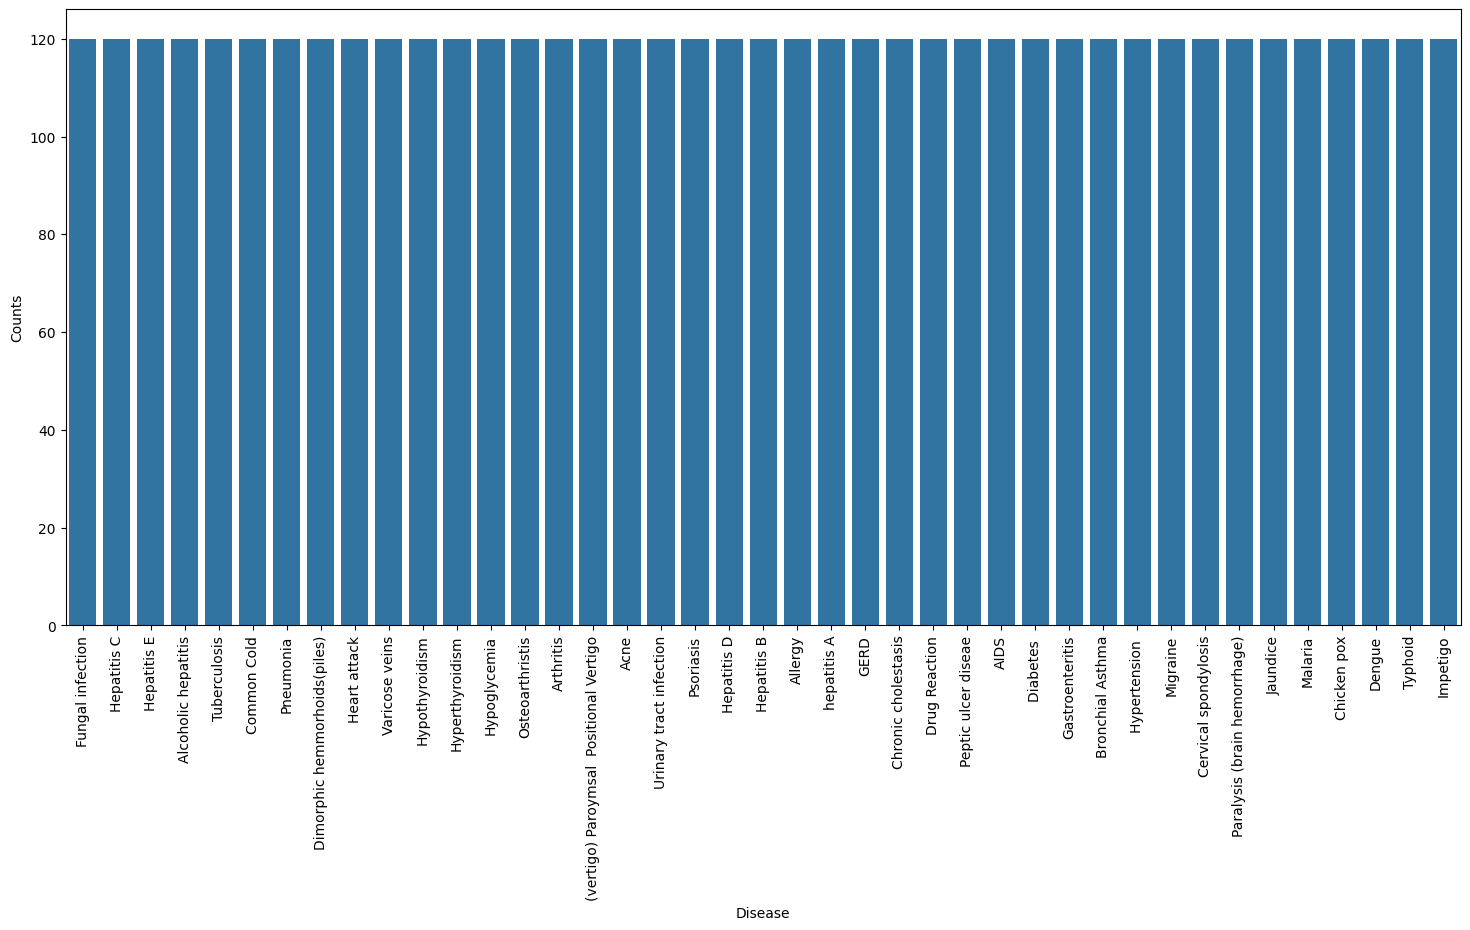

(Index(['Fungal infection', 'Hepatitis C', 'Hepatitis E', 'Alcoholic hepatitis',
        'Tuberculosis', 'Common Cold', 'Pneumonia',
        'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
        'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis',
        'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
        'Urinary tract infection', 'Psoriasis', 'Hepatitis D', 'Hepatitis B',
        'Allergy', 'hepatitis A', 'GERD', 'Chronic cholestasis',
        'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
        'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
        'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
        'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'Impetigo'],
       dtype='object', name='prognosis'),
 array([120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
        120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
        120, 120, 120

In [19]:
DATA_PATH = '/content/Training.csv'
data = pd.read_csv(DATA_PATH).dropna(axis = 1) # drop column if contain null values

disease_count = data['prognosis'].value_counts() # number of diseases
print(disease_count)
temp_df = pd.DataFrame({
        'Disease': disease_count.index,
        'Counts': disease_count.values
})

plt.figure(figsize=(18,8))
sns.barplot(x = 'Disease', y = 'Counts', data = temp_df)
plt.xticks(rotation = 90)
plt.show()

disease_count.index, disease_count.values

In [21]:
# labeling the output using LabelEncoder
le = LabelEncoder()

# Encode the 'prognosis' column with integers
data['prognosis'] = le.fit_transform(data['prognosis'])

# Display the first few rows of the updated dataset
data.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [8]:
X = data.iloc[:,:-1] # training features
y = data.iloc[:,-1]  # training labels
print(f"Full Dataset: {X.shape}, {y.shape}")

# split training data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Full Dataset: (4920, 132), (4920,)
Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [9]:
# Head of train, test
print(f"Train: {X_train.head()}, {y_train.head()}")
print(f"Test: {X_test.head()}, {y_test.head()}")

Train:       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
1807        1          1                     0                    0   
184         0          0                     0                    0   
205         1          0                     0                    0   
4581        0          0                     0                    0   
410         1          1                     1                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
1807          0       0           0             0        0                 0   
184           0       1           0             0        0                 0   
205           0       0           0             0        0                 0   
4581          0       0           0             0        0                 0   
410           0       0           0             0        0                 0   

      ...  pus_filled_pimples  blackheads  scurring  skin_peeling  \
1807  ...       

**MODEL BUILDING**


In [10]:
def cv_scoring(estimator, X, y):
  return accuracy_score(y, estimator.predict(X))

models ={
    'SVC': SVC(),
    'GaussianNB': GaussianNB(),
    'RandomForestClassifier': RandomForestClassifier(random_state = 42)
}

for model_name in models:
  model = models[model_name]
  score = cross_val_score(model, X, y, cv = 10, n_jobs = -1, scoring = cv_scoring)

  print(f"{model_name}:{score}, {np.mean(score)}")

SVC:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], 1.0
GaussianNB:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], 1.0
RandomForestClassifier:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], 1.0


**Building robust classifier by combining all models:**

Accuracy on train data: 100.0
Accuracy on test data: 100.0


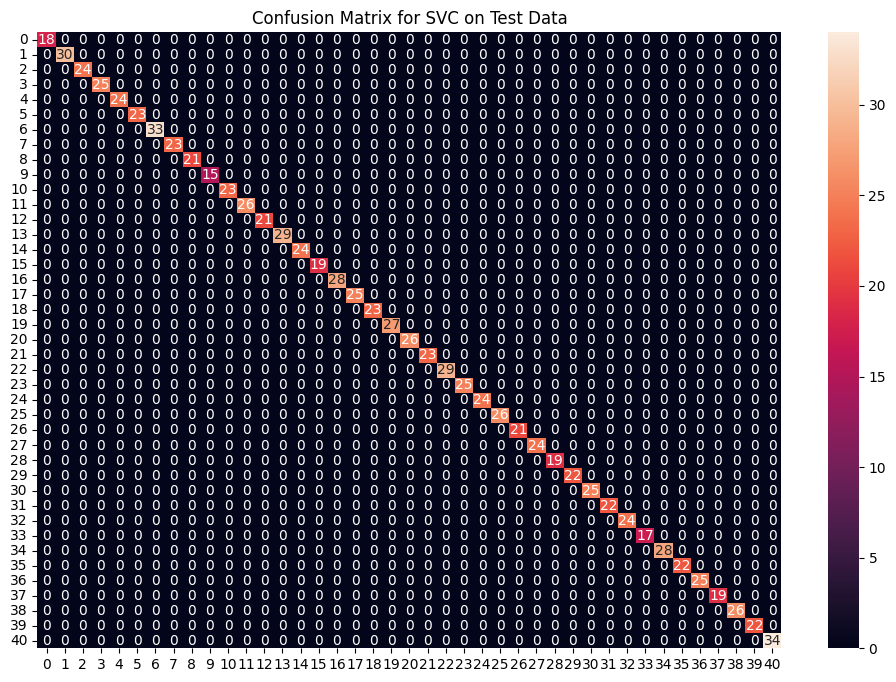

In [11]:
# 1) Training and Testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize = (12, 8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for SVC on Test Data")
plt.show()


Accuracy on train data: 100.0
Accuracy on test data: 100.0


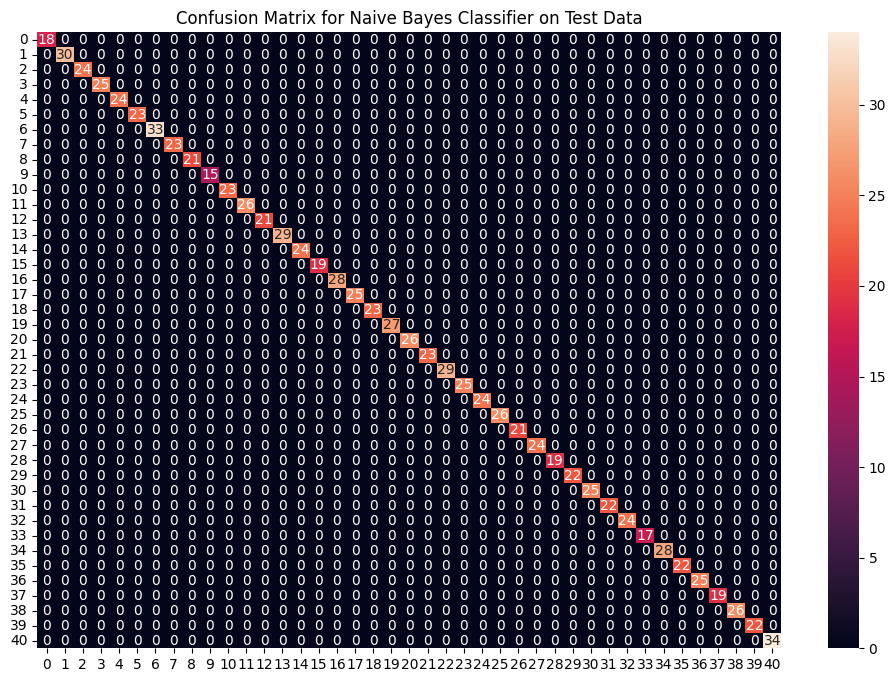

In [12]:
# 2) Training and Testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)

print(f"Accuracy on train data: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize = (12, 8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()


Accuracy on train data: 100.0
Accuracy on test data: 100.0


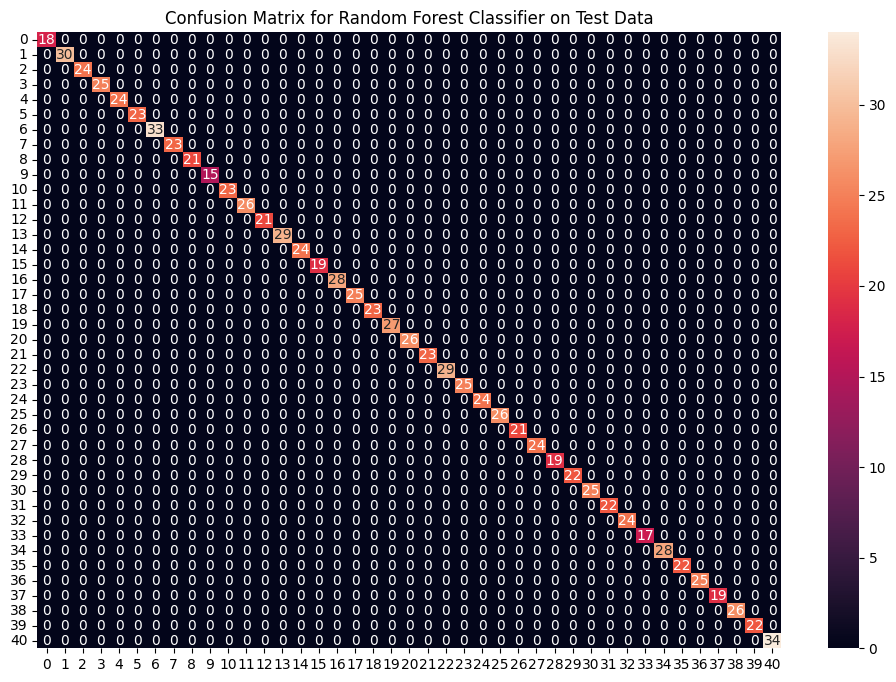

In [13]:
# 3) Training and Testing RandomForest Classifier
rf_model = RandomForestClassifier(random_state =18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

print(f"Accuracy on train data: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize = (12, 8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()


**Fitting the model on whole data and validating on the Test dataset:**

Accuracy on Test dataset by the Combined Model:  100.0


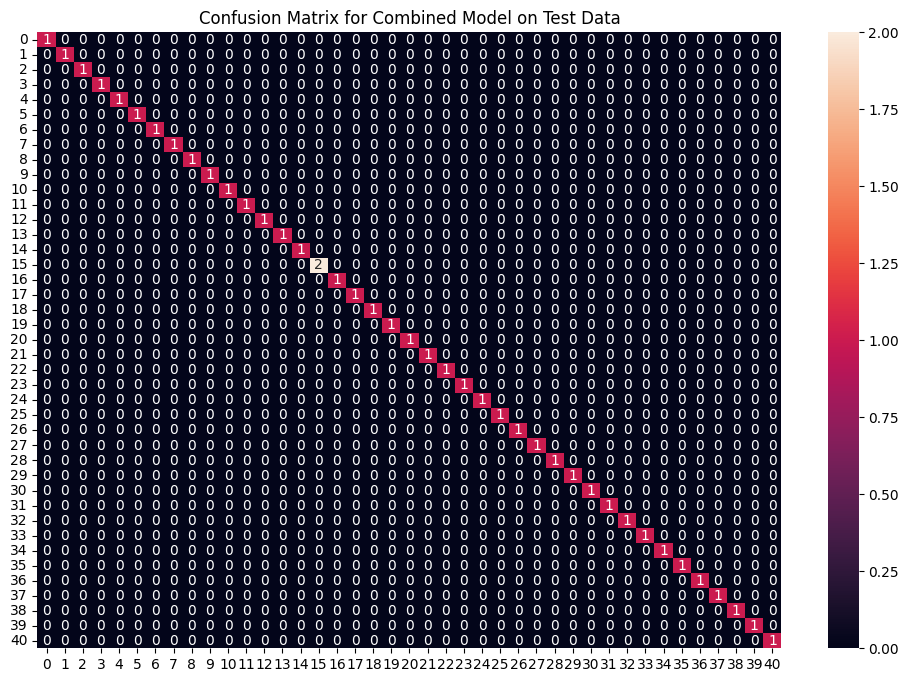

In [28]:
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier()

final_svm_model.fit(X,y)
final_nb_model.fit(X,y)
final_rf_model.fit(X,y)

# reading Test Data
test_data = pd.read_csv('/content/Testing.csv').dropna(axis = 1)
test_X = test_data.iloc[:,:-1]
test_data['prognosis'] = le.fit_transform(test_data['prognosis'])
test_y = test_data['prognosis']

# test_y = le.transform(test_data.iloc[:,-1])

final_svm_preds = final_svm_model.predict(test_X)
final_nb_preds = final_nb_model.predict(test_X)
final_rf_preds = final_rf_model.predict(test_X)

!pip install scipy
from scipy import stats

final_pred = [stats.mode([i,j,k])[0] for i,j,k in zip(final_svm_preds, final_nb_preds, final_rf_preds)]

print(f"Accuracy on Test dataset by the Combined Model:  {accuracy_score(test_y, final_pred)*100}")

cf_matrix = confusion_matrix(test_y, final_pred)
plt.figure(figsize = (12, 8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Data")
plt.show()

**Creating a function that can take symptoms as input and generate predictions for disease**

In [29]:
le.classes_ # diseases names

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [30]:
s = X.columns.values
s

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_press

In [36]:
symptoms = X.columns.values # columns names

# Creating a symptom index dictionary to encode the input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":le.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = pd.DataFrame([input_data], columns=X.columns)

    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # making final prediction by taking mode of all predictions
    # Use statistics.mode instead of scipy.stats.mode
    import statistics
    final_prediction = statistics.mode([rf_prediction, nb_prediction, svm_prediction])
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
prediction = predictDisease("Burning Micturition,Anxiety,Drying And Tingling Lips")
print(f"The Predictions Made by Each Model: {prediction}")
print(f"The Final Prediction : {prediction['final_prediction']}")
# This code is modified by Susobhan Akhuli


The Predictions Made by Each Model: {'rf_model_prediction': 'Impetigo', 'naive_bayes_prediction': 'Impetigo', 'svm_model_prediction': 'Impetigo', 'final_prediction': 'Impetigo'}
The Final Prediction : Impetigo


In [31]:
data_dict

{'symptom_index': {'Itching': 0,
  'Skin Rash': 1,
  'Nodal Skin Eruptions': 2,
  'Continuous Sneezing': 3,
  'Shivering': 4,
  'Chills': 5,
  'Joint Pain': 6,
  'Stomach Pain': 7,
  'Acidity': 8,
  'Ulcers On Tongue': 9,
  'Muscle Wasting': 10,
  'Vomiting': 11,
  'Burning Micturition': 12,
  'Spotting  urination': 13,
  'Fatigue': 14,
  'Weight Gain': 15,
  'Anxiety': 16,
  'Cold Hands And Feets': 17,
  'Mood Swings': 18,
  'Weight Loss': 19,
  'Restlessness': 20,
  'Lethargy': 21,
  'Patches In Throat': 22,
  'Irregular Sugar Level': 23,
  'Cough': 24,
  'High Fever': 25,
  'Sunken Eyes': 26,
  'Breathlessness': 27,
  'Sweating': 28,
  'Dehydration': 29,
  'Indigestion': 30,
  'Headache': 31,
  'Yellowish Skin': 32,
  'Dark Urine': 33,
  'Nausea': 34,
  'Loss Of Appetite': 35,
  'Pain Behind The Eyes': 36,
  'Back Pain': 37,
  'Constipation': 38,
  'Abdominal Pain': 39,
  'Diarrhoea': 40,
  'Mild Fever': 41,
  'Yellow Urine': 42,
  'Yellowing Of Eyes': 43,
  'Acute Liver Failure': 4